In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Data Science Projects\Hotel Booking Cancellation Prediction\hotel_bookings.csv')

In [3]:
df.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


# Data Cleaning

In [4]:
df.shape

(119390, 32)

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
#Drop the columns 'agent' and 'company' 
df.drop(['agent','company'], axis=1, inplace=True)

In [7]:
#To check what values are present in country column
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [8]:
# index gives the count in list
df['country'].value_counts().index

Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD',
       ...
       'MMR', 'NPL', 'BHS', 'UMI', 'SMR', 'DJI', 'BWA', 'HND', 'VGB', 'NAM'],
      dtype='object', length=177)

In [9]:
#To fill the missing values of country column with index value present at zeroth index
df['country'].fillna(df['country'].value_counts().index[0], inplace = True)

In [10]:
#To fill any missing value with 0
df.fillna(0, inplace = True)

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
#seems to have some dirtiness in data as Adults,babies & children cannot be zero at a same time, 
#so we need to remove those entries
# bcz if 3 entities are 0 ,then how can a booking be possible ??
# Visualise Entire Dataframe where adult,children & babies are 0
filter1 = (df['adults']==0) & (df['children']==0) & (df['babies']==0)
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [13]:
#Storing the entries which doesnot satisfy filter1 condition, so used negation
#Total entries/rows in filter1 condition is 180, so 180 entries are removed from negation of filter
print(df.shape)
data = df[~filter1]
print(data.shape)

(119390, 30)
(119210, 30)


# Where do guest come from

In [14]:
#It shows the unique values present in column 'is_canceled'
#Here it has 2 unique values 0= not cancelled, 1=cancelled
data['is_canceled'].unique()

array([0, 1], dtype=int64)

In [15]:
#Getting frequency of not cancelled bookings w.r.t country
#data is used again to store into dataframe
data[data['is_canceled']==0]['country'].value_counts()

PRT    21398
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 165, dtype: int64

In [16]:
#Getting total number of bookings, which are not cancelled
len(data[data['is_canceled']==0])

75011

In [17]:
#Dividing by length, we'll get how much percent of bookings are booked from each country
data[data['is_canceled']==0]['country'].value_counts()/75011

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [18]:
#To convert into dataframe use reset_index
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country', 'no_of_guest']
country_wise_data

,country,no_of_guest
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [19]:
#We need plotly in offline mode, from plotly we need to import download_plotlyjs because plotly is designed in javascript
#So we need its supportive class, plot and iplot(interactive plot) are used when we need to showcase our ipython notebook
#Connected = true means we are able to visualize in offline mode
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [20]:
import plotly.express as px

In [21]:
map_guest = px.choropleth(country_wise_data,
                         locations=country_wise_data['country'],
                         color=country_wise_data['no_of_guest'],
                         hover_name=country_wise_data['country'],
                         title='Home Country of Guests')

In [22]:
map_guest.show()
#Conclusion : People from all over the world are staying in these two hotels. 
#Most guests are from Portugal and other countries in Europe

# How much do guests pay for a room per night

Both hotels have different room types and different meal arrangements. Seasonal factors are also important. 
So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union,
I assume that all prices are in EUR.

In [23]:
data2=data[data['is_canceled']==0]

In [24]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price( EUR)')

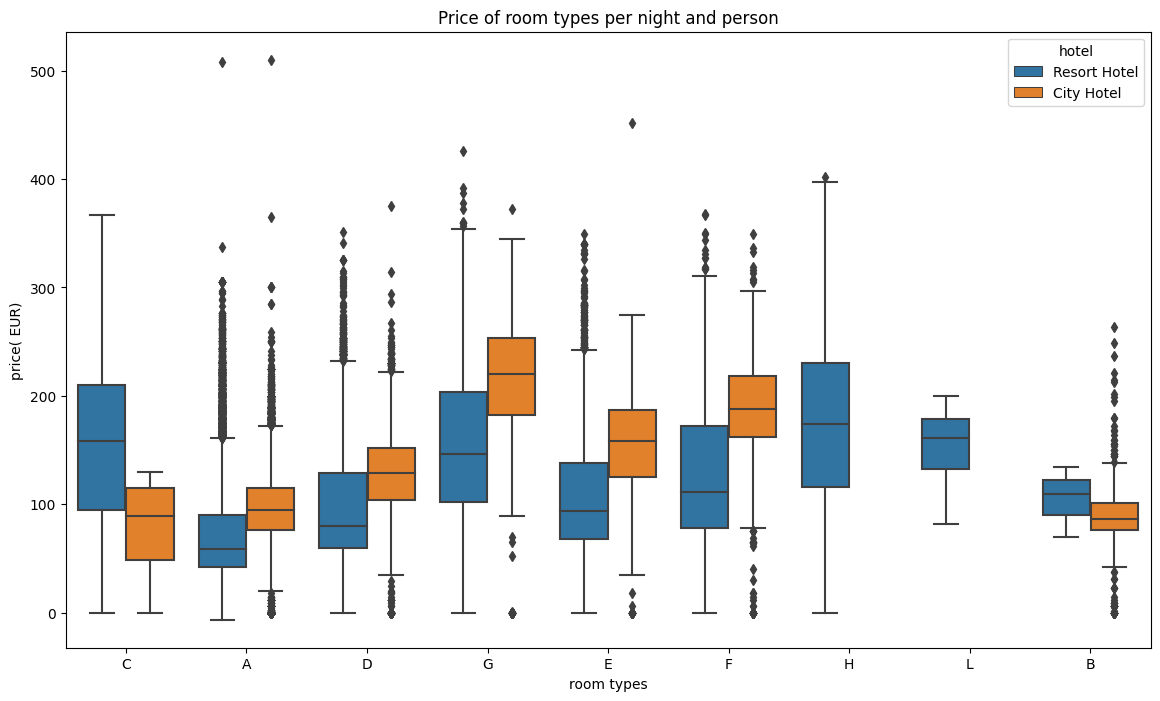

In [25]:
#sns boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=data2)
plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price( EUR)')

This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

# Which are the most busy month ?

In [26]:
data['hotel'].unique() #two types of hotels Rsort hotel and city hotels

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [27]:
data_resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city = data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [28]:
data_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [29]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index() #reset index is used to convert into dataframe
rush_resort.columns=['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [30]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [31]:
final_rush=rush_resort.merge(rush_city,on='month') #merge is to merge two dataframes

In [32]:
final_rush.columns=['month','no_of_guests_in_resort','no_of_guests_city'] #as on left is resort so first column will be guest in resort and then second column will be guest in city 

In [33]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [34]:
import sort_dataframeby_monthorweek as sd

In [35]:
final_rush = sd.Sort_Dataframeby_Month(final_rush, 'month') #first is dataframe name and next is column you want to sort

In [36]:
final_rush.columns

Index(['month', 'no_of_guests_in_resort', 'no_of_guests_city'], dtype='object')

In [37]:
px.line(data_frame = final_rush, x='month', y=['no_of_guests_in_resort', 'no_of_guests_city'])

#from above graph July , August, September has rush 

# Which month has Average Daily Rate

In [38]:
data = sd.Sort_Dataframeby_Month(data, 'arrival_date_month')

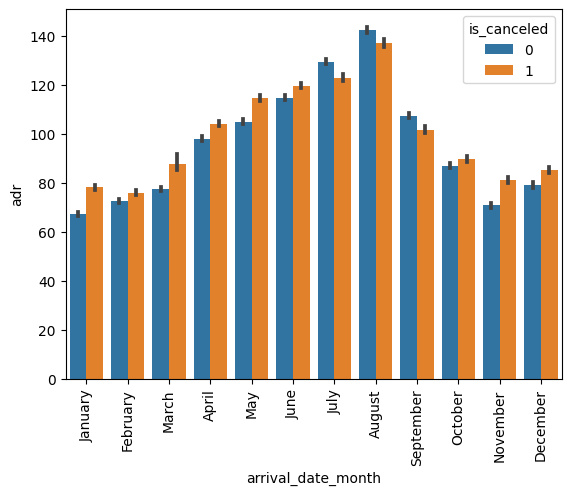

In [39]:
sns.barplot(x='arrival_date_month', y = 'adr', data=data, hue='is_canceled' )
plt.xticks(rotation='vertical') #to make vertical the names of months on x axis
plt.show()
#cancelled booking(1) has high adr than not cancelled bookings(0)

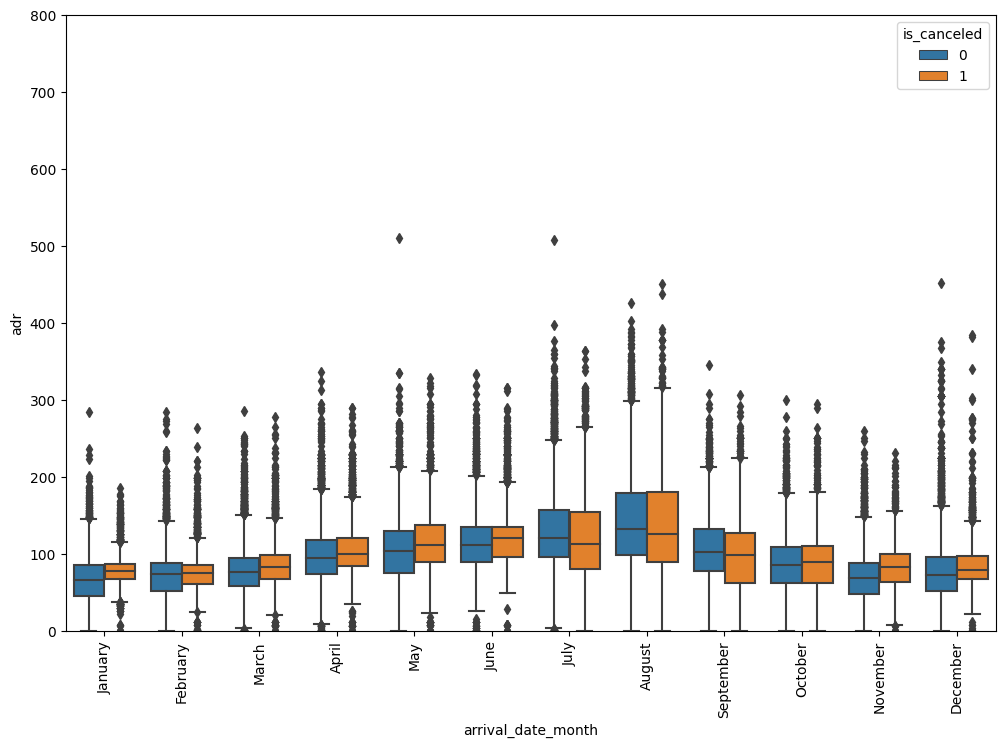

In [40]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month', y = 'adr', data=data, hue='is_canceled' )
plt.xticks(rotation='vertical') #to make vertical the names of months on x axis
plt.ylim(0,800) # to not include outliers so set limit on y axis
plt.show()

# Analyze whether bookings were made only for weekdays or weekends or both

In [42]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [43]:
### Lets create a relationship table..
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
## lets define our own function :

def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [45]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1) #apply method has 2 attributes first is function name and second axis 1 to change columns

In [46]:
data2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data


In [47]:
data2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: weekend_or_weekday, dtype: int64

In [48]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [49]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size() #counts of each category in each month

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_both_weekdays_weekends    1550


In [50]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [51]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [52]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [53]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<AxesSubplot: xlabel='arrival_date_month'>

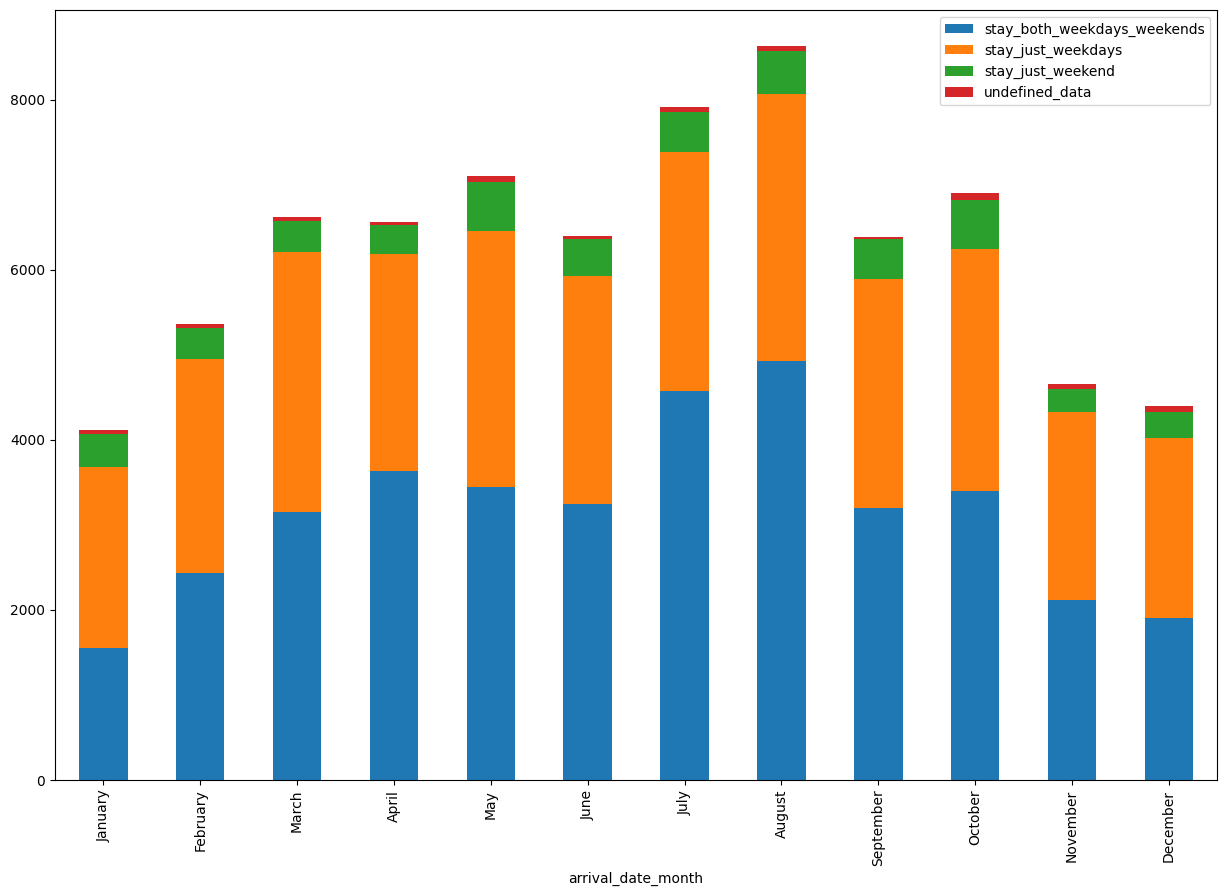

In [54]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

# How to create some more features

In [55]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [56]:
def family(row):
    if (row['adults']>0) &  (row['children']>0 or row['babies']>0) :
        return 1
    else:
        return 0

In [57]:
data['is_family']=data.apply(family,axis=1)

In [58]:
data['total_customer'] = data['adults'] + data['babies'] + data['children']

In [59]:
data['total_nights']=data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [60]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [61]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [62]:
dict1={'No Deposit':0, 'Non Refund':1, 'Refundable': 0}
data['deposit_given']=data['deposit_type'].map(dict1)

In [63]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [64]:
data.drop(columns=['adults', 'children', 'babies', 'deposit_type'],axis=1,inplace=True)

In [65]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

# Feature Encoding

In [66]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [67]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [68]:
cate_features=[col for col in data.columns if data[col].dtype=='object'] # starting from square brackets means select the col which has dtype as object

In [69]:
num_features=[col for col in data.columns if data[col].dtype!='object']

In [70]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [71]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [72]:
data_cat=data[cate_features]

In [73]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict() #to_dict converts into dictionary

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [74]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [75]:
data_cat['cancellation']=data['is_canceled']

In [76]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1


In [77]:
cols=data_cat.columns

In [78]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation'],
      dtype='object')

In [79]:
cols=cols[0:-1]

In [80]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [81]:
#Perform Mean Encoding Technique 

for col in cols:
    dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [82]:
data_cat.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1


# Handling outliers

In [83]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [84]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [85]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [86]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [87]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0


<AxesSubplot: xlabel='lead_time', ylabel='Density'>

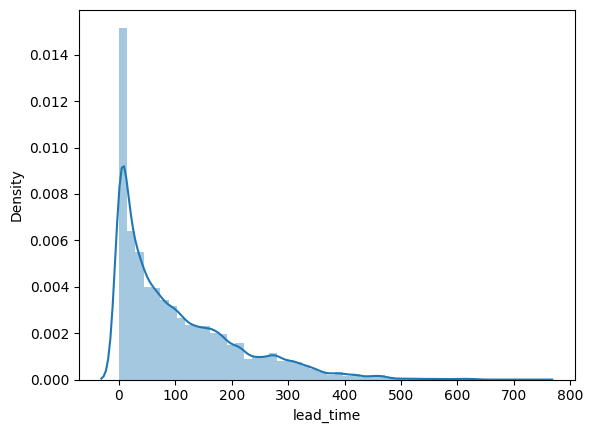

In [88]:
sns.distplot(dataframe['lead_time'])

In [89]:
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col]) #log1p is function which gives result as ln(x+1)

In [90]:
handle_outlier('lead_time')

<AxesSubplot: xlabel='lead_time', ylabel='Density'>

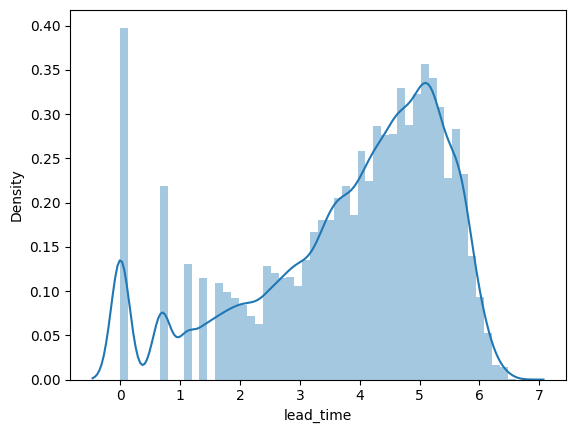

In [91]:
sns.distplot(dataframe['lead_time'])

<AxesSubplot: xlabel='adr', ylabel='Density'>

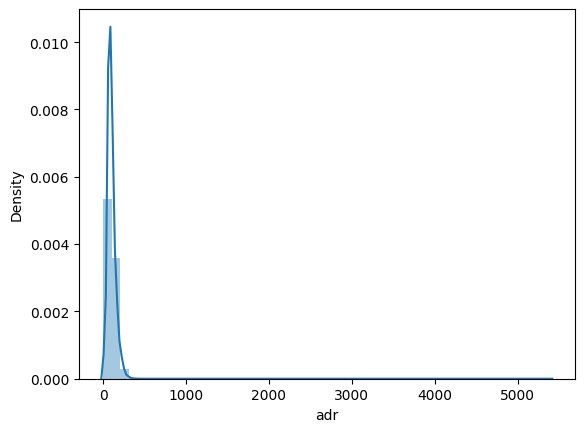

In [92]:
sns.distplot(dataframe['adr'])

In [93]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [94]:
handle_outlier('adr')

In [95]:
dataframe['adr'].isnull().sum()

1

<AxesSubplot: xlabel='adr', ylabel='Density'>

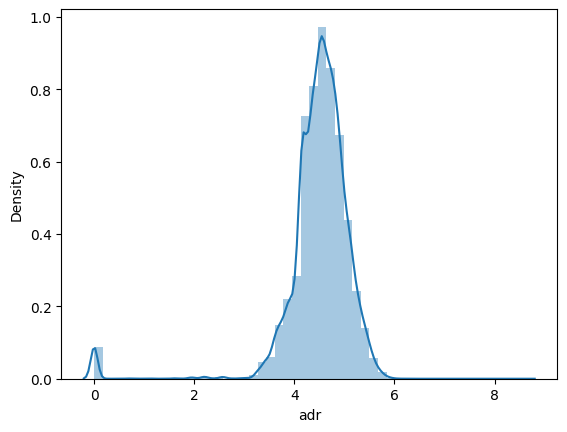

In [96]:
sns.distplot(dataframe['adr'].dropna())

# Select imp features using correlation and univariate analysis

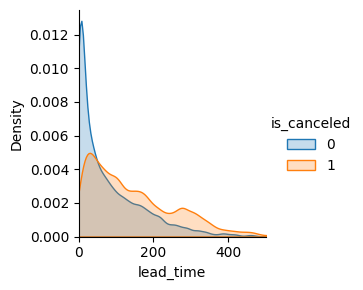

In [97]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()
#if overlapping is low then feature is good and if overlapping is high then feature is not goodt for the model

In [98]:
corr=dataframe.corr()

In [99]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.055689,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.160759,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,0.018554,0.481507


In [100]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [101]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [102]:
features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [103]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [104]:
dataframe.shape

(119210, 24)

# how to find important features for model building

In [105]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0,...,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0,...,0,0,0,4.763028,1,1,1,4.0,1,0


In [106]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given                     0
dtype: int64

In [107]:
dataframe.dropna(inplace=True)

In [108]:
#Separtaing independent and dependent features
x = dataframe.drop('is_canceled', axis = 1)

In [109]:
y = dataframe['is_canceled']

In [110]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [111]:
#Using Lasso regression here
#Lasso(alpha=0.005)
# select a suitable alpha (equivalent of penalty) alpha is penalty value.
# The bigger the alpha the less features that will be selected.
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [112]:
#Fit the x and y variables into the model
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [113]:
feature_sel_model.get_support()
#True means feature is selected and false means feature is not selected 

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [114]:
cols=x.columns

In [119]:
#These are all features present
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [117]:
selected_feature=cols[feature_sel_model.get_support()]

In [118]:
#These are only the features selected 
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [120]:
x=x[selected_feature]

In [121]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

# Building a Logistic regression model

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [126]:
x_train.shape

(89406, 12)

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
logreg = LogisticRegression()

In [129]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [130]:
pred = logreg.predict(x_test)

In [131]:
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix(y_test, pred)

array([[17341,  1502],
       [ 4531,  6429]], dtype=int64)

In [134]:
from sklearn.metrics import accuracy_score

In [135]:
accuracy_score(y_test, pred)

0.797570714357615

# Cross Validate the model

In [136]:
from sklearn.model_selection import cross_val_score

In [142]:
score=cross_val_score(logreg,x,y,cv=10)

In [143]:
score

array([0.77862595, 0.78433017, 0.78240081, 0.81553561, 0.81494841,
       0.7393675 , 0.74012247, 0.8557168 , 0.8307189 , 0.80419463])

In [144]:
score.mean()

0.7945961261188731

In [145]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [146]:
models=[]

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [148]:
for name,model in models:
    print(name)
    model.fit(x_train,y_train)
    
    predictions=model.predict(x_test)
    
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print('\n')

LogisticRegression
[[17341  4531]
 [ 1502  6429]]
0.797570714357615


Naive_bayes
[[ 6912   698]
 [11931 10262]]
0.5762507130154683


Random Forest
[[17197  2709]
 [ 1646  8251]]
0.8538737710968695


Decision_tree
[[15960  2601]
 [ 2883  8359]]
0.8159916786900647


KNN
[[16775  3331]
 [ 2068  7629]]
0.8188437405630306


